# Part 2: Multiple Linear Regression

Multiple linear regression is based on the same idea as Simple Linear Regression ($y = b_{0} + b_{1}*x_{1}$) but having more than 1 independent variables(IV).  
$y = b_{0} + b_{1}*x_{1} + b_{2}*x_{2} + b_{3}*x_{3} ... b_{n}*x_{n}$
* $y$ = Dependent variable (ID).
* $b_0$ = Constant
* $b_{1} ... b_{n}$ = Coefficients 
* $x_{1} ... x_{n}$ = Dependent variables (DV).
![Multiple linear regression](images/multiple_lr.PNG)

## Code

### Import libraries

In [17]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm

### Dataset preprocessing

In [55]:
# Load dataset
data_path = '50_Startups.csv'
dataset = pd.read_csv(data_path)
# Create matrix of features and dependent variable.
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
# Create dummy variables for categorical variable state (encode categoricla values)
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)
# Avoid Dummy Variable Trap
X = X[:, 1:]
# Split dataset in Training and Test sets.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

### Train MLR model

In [59]:
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Test MLR model

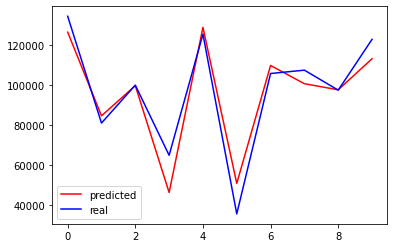

In [61]:
y_pred = mlr.predict(X_test)
plt.plot(y_pred, label='predicted', color='r')
plt.plot(Y_test, label='real', color='b')
plt.legend()
plt.show()

### Model improvement

The MLR model is trained making use of the independent variables (in this case: R&D Spend, Administration, Marketing Spend, State) in order to try to predict the value of the dependent variable (profit). But not all the independent variables strictly have the same affectation to the dependent variable. In order to improve the model is worthless to find those less and more significant variables and train the model using the independent variables that really matters.

### Backward elimination

![Multiple linear regression](images/bw_elimination.PNG)

In [56]:
# Add x0 to the formula as the independent variable of b0
# by adding a column of 1s in the first position of the dataset
X = np.append(arr = np.ones((50, 1)).astype(int), values=X, axis=1)

In [113]:
# Create MLR model by using statsmodels API and OLS class
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = np.array(X_opt, dtype=float) # Avoid dtpype error
Y = np.array(Y, dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
# Remove the preditor with highest P if P > SL(0.05) -> Remove X2
X_opt = np.array(X[:, [0, 1, 3, 4, 5]], dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
# Remove the preditor with highest P if P > SL(0.05) -> Remove X1
X_opt = np.array(X[:, [0, 3, 4, 5]], dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
# Remove the preditor with highest P if P > SL(0.05) -> Remove X2
X_opt = np.array(X[:, [0, 3, 5]], dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
# Remove the preditor with highest P if P > SL(0.05) -> Remove X2
X_opt = np.array(X[:, [0, 3, 5]], dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
# Remove the preditor with highest P if P > SL(0.05) -> Remove X2
X_opt = np.array(X[:, [0, 3]], dtype=float)
mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           3.50e-32
Time:                        19:59:41   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BackwardElimination useful function
**BackwardElimination**(Y_values, X_values, sl)
* Y_values: dependent variable column
* X_values: independent variable values (with constant)
* sl: Significance level (usually 0.5)

In [80]:
def BackwardElimination(Y_values, X_values, sl):
    idx = [i for i in range(X_values.shape[1])]
    Y = np.array(Y_values, dtype=float)
    X_opt = np.array(X[:, idx], dtype=float)
    mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
    while max(mlr_OLS.pvalues > sl):
        r_idx = np.argmax(mlr_OLS.pvalues)
        idx.pop(r_idx)
        X_opt = np.array(X[:, idx], dtype=float)
        mlr_OLS = sm.OLS(endog=Y, exog =X_opt, dtype=float).fit()
        
    return X_opt, mlr_OLS

In [116]:
x_opt, mlr_OLS = BackwardElimination(Y,X,0.05)